In [1]:
import numpy as np
import tikzplotlib
import matplotlib.pyplot as plt
import torch
from torch import tensor

In [2]:
# Fix for matplotlib legend - maybe not necessary for this version of matplotlib
def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

#### Creating plot of demand and supply functions

In [3]:
sigma = 0.5
def flux(rho):
    return rho * (1. - rho)

fmax = flux(sigma)

def D(rho):
    if rho <= sigma:
        return flux(rho)
    else:
        return fmax

def S(rho):
    if rho <= sigma:
        return fmax
    else:
        return flux(rho)

In [4]:
densities = np.linspace(0, 1, 101)
first_half = np.linspace(0, 0.5, 51)
second_half = np.linspace(0.5, 1, 51)
first_flux = np.array([flux(d) for d in first_half])
second_flux = np.array([flux(d) for d in second_half])
demand = np.array([D(d) for d in densities])
supply = np.array([S(d) for d in densities])

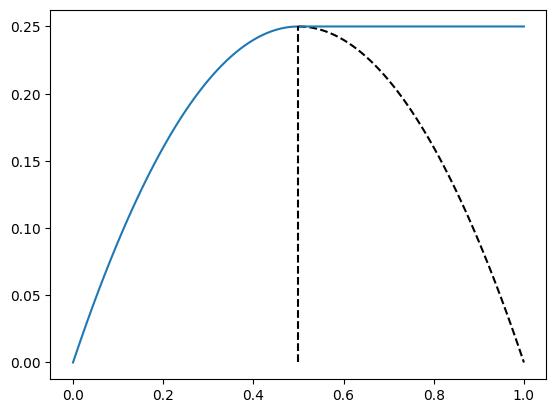

In [5]:
# Creating plot of demand:
fig = plt.figure()
plt.plot(second_half, second_flux, 'k--', label='Original flux')
plt.plot(densities, demand, label='Demand')
plt.plot(np.ones(100)*0.5, np.linspace(0, fmax, 100), 'k--')

# tikzplotlib.save("../figurer/demand.tex")

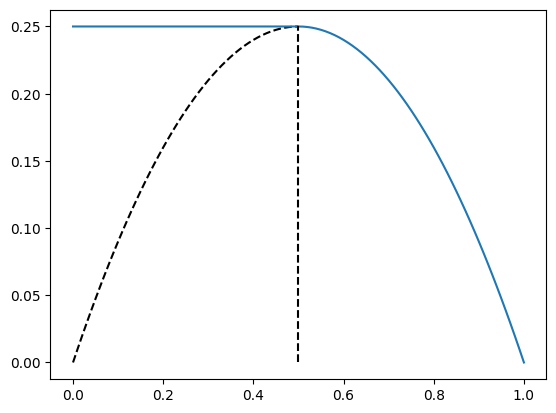

In [6]:
# Creating plot of supply:
fig = plt.figure()
plt.plot(first_half, first_flux, 'k--', label='Original flux')
plt.plot(densities, supply, label='Supply')
plt.plot(np.ones(100)*0.5, np.linspace(0, fmax, 100), 'k--')

# tikzplotlib.save("../figurer/supply.tex")

#### Creating plot of Hermite basis functions on unit interval

In [7]:
def h_00(x):
    return (1 + 2*x) * (1-x)**2

def h_10(x):
    return x * (1-x)**2

def h_01(x):
    return x**2 * (3 - 2*x)

def h_11(x):
    return x**2 * (x-1)


In [8]:
x = np.linspace(0, 1, 100)
x_00 = h_00(x)
x_10 = h_10(x)
x_01 = h_01(x)
x_11 = h_11(x)

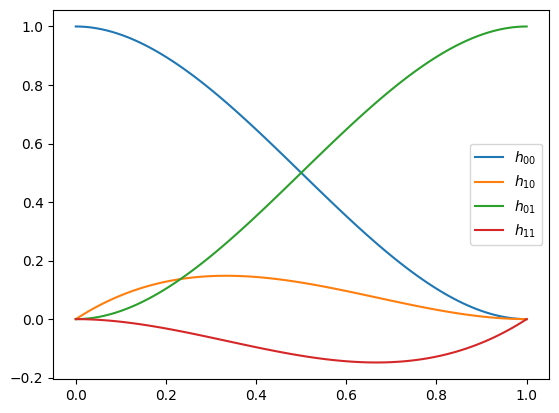

In [9]:
fig = plt.figure()
plt.plot(x, x_00, label='$h_{00}$')
plt.plot(x, x_10, label='$h_{10}$')
plt.plot(x, x_01, label='$h_{01}$')
plt.plot(x, x_11, label='$h_{11}$')
plt.legend()
# plt.show()

# Fixing issue with legend
tikzplotlib_fix_ncols(fig)

# Saving as tikz figure
# tikzplotlib.save("../figurer/hermite_basis.tex")

#### Creating plots of priority funcitons for some choices of $h^1$, $h^0$... 

In [19]:
h_0 = [0.6, 0.6, 0.7, 0.7, 0.51]
h_max = [0.8, 0.9, 0.8, 0.9, 0.99]
h_1 = [0.6, 0.7, 0.6, 0.7, 0.51]
rho_m = [0.5, 0.6, 0.6, 0.5, 0.3]

In [20]:
def h(h_0, h_max, h_1, rho_m, rho):
    t_2 = (rho - rho_m) / (1 - rho_m)

    if rho < rho_m:
        # m_0 = 1/rho_m * (h_max - h_0)
        m_0 = 1/rho_m * (h_max - h_0)
        t_1 = rho / rho_m
        return h_00(t_1) * h_0 + h_10(t_1) * rho_m * m_0 + h_01(t_1) * h_max
    else:
        # m_2 = (h_1 - h_max) / (1 - rho_m)
        m_2 = 1*(h_1 - h_max) / (1 - rho_m)
        t_2 = (rho - rho_m) / (1 - rho_m)
        return h_00(t_2) * h_max + h_01(t_2) * h_1 + h_11(t_2) * (1-rho_m) * m_2

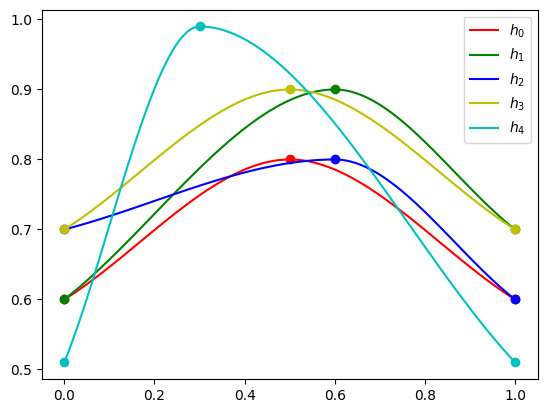

In [21]:
rho = np.linspace(0, 1, 100)
h_values = [np.array([h(h_0, h_max, h_1, rho_m, r) for r in rho]) for h_0, h_max, h_1, rho_m in zip(h_0, h_max, h_1, rho_m)]
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']
fig = plt.figure()
for i, [h_0_i, h_max_i, h_1_i, rho_m_i, h_val] in enumerate(zip(h_0, h_max, h_1, rho_m, h_values)):
    plt.plot(rho, h_val, colors[i], label=f'$h_{i}$')
    plt.plot([0,rho_m_i, 1], [h_0_i, h_max_i, h_1_i], colors[i] + 'o')
plt.legend()
# plt.show()
tikzplotlib_fix_ncols(fig)

# Saving as tikz figure
# tikzplotlib.save("../figurer/priority_fncs.tex")